#### 2. Assume that you are [Georg Simon Ohm](https://en.wikipedia.org/wiki/Georg_Ohm) trying to come up with a model for resistance that relates voltage and current. Can you use automatic differentiation to learn the parameters of your model?

Ohm's law is given by $R = V / I$, we'll generate noisy data of triples and train a model based on gradient descent to obtain the desired relationship. We can then train a neural net based on square mean loss and based on the models given.

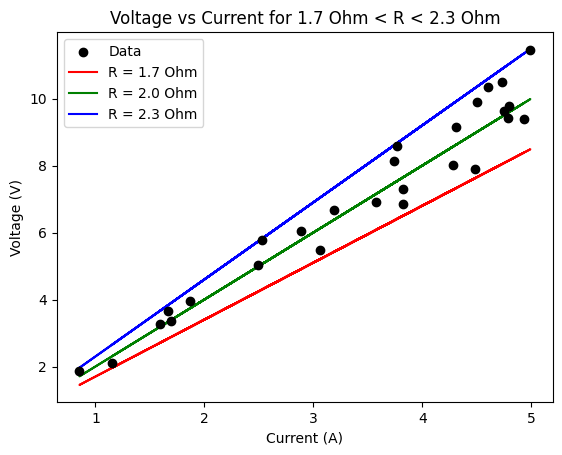

In [27]:
import numpy as np
import matplotlib.pyplot as plt

_rng = np.random.default_rng(0x2024_03_19)

# Voltages typically range from a few millivolts to hundreds of volts
voltages = _rng.uniform(0.01, 24.0, size=500)  # Voltages from 0.01V to 24V
voltages += _rng.normal(0.0, 0.05, size=500)  # Add voltage measurement noise (50mV std dev)

# Currents typically range from microamps to amps
currents = _rng.uniform(0.000001, 5.0, size=500)  # Currents from 1μA to 5A
currents += _rng.normal(0.0, 0.0001, size=500)  # Add current measurement noise (100μA std dev)

resistances = voltages / currents  # Calculate true resistances using Ohm's law

# Resistances can vary widely depending on the material and component
resistances += _rng.normal(0.0, 0.01, size=500)  # Add resistance measurement noise (0.01Ω std dev)

assert voltages.min() > 0, "Voltages must be positive"
assert currents.min() > 0, "Currents must be positive"
assert resistances.min() > 0, "Resistances must be positive"

lower_resistance = 1.7 
middle_resistance = 2.0
upper_resistance = 2.3

lower_upper_slicer = (resistances > lower_resistance) & (resistances < upper_resistance)
plot_voltages: np.ndarray = voltages[lower_upper_slicer]
plot_currents: np.ndarray = currents[lower_upper_slicer]

plt.scatter(plot_currents, plot_voltages, c = "black", label = "Data", zorder = 1)

lower_line = lower_resistance * plot_currents
plt.plot(plot_currents, lower_line, color='r', zorder = 0, label = "R = 1.7 Ohm")
mid_line = middle_resistance * plot_currents
plt.plot(plot_currents, mid_line, color='green', zorder = 0, label = "R = 2.0 Ohm")
upper_line = upper_resistance * plot_currents
plt.plot(plot_currents, upper_line, color='b', zorder = 0, label = "R = 2.3 Ohm")

plt.xlabel("Current (A)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Current for 1.7 Ohm < R < 2.3 Ohm")
plt.legend()
plt.savefig("linear-regression-scratch_2_1.png")